In [1]:
#importing all the libraries that are required
import numpy as np
import pandas as pd

In [2]:
#fixing warnings with the below functions
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()
    
import warnings
warnings.filterwarnings("ignore")

In [5]:
#installing packages for tabulating the columns
!pip install pydotplus
!pip install tabulate
import matplotlib.pyplot as plt   
from pydotplus import graph_from_dot_data
from IPython.display import Image  
import seaborn as sns
from IPython.display import HTML, display
import tabulate

In [6]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [7]:
#sklearn for scientific calculations
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [9]:
#decision tree classifier for decision tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor

In [18]:
#kmean clustering formation
from sklearn.neighbors import KNeighborsClassifier

In [19]:
#implementing logistic regression
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

DATA PREPROCESSING

In [22]:
#loading dataset and concating them
df1=pd.read_csv('https://raw.githubusercontent.com/LIZABelkacem/Road_Accident_Prediction/master/data/2014%20excel.csv')
df2=pd.read_csv('https://raw.githubusercontent.com/LIZABelkacem/Road_Accident_Prediction/master/data/2015%20excel.csv')
df3=pd.read_csv('https://raw.githubusercontent.com/LIZABelkacem/Road_Accident_Prediction/master/data/2016%20excel.csv')
frames = [df1, df2, df3]
result = pd.concat(frames, axis=0)
result.head(10)

,Reference Number,Grid Ref: Easting,Grid Ref: Northing,Number of Vehicles,Expr1,Accident Date,Day,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,12N1424,435232,427614,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Darkness no street lighting,Fine without high winds,Driver,Serious,Male,19,Car
1,12N1424,435232,427614,1,NaN,23/02/2014,Sunday,1840,Unclassified,Dry,Darkness no street lighting,Fine without high winds,Passenger,Serious,Male,19,Car
2,1380117,435678,440221,1,NaN,08/03/2014,Saturday,130,A,Dry,Darkness no street lighting,Fine without high winds,Driver,Serious,Male,21,Car
3,1370105,422649,440068,1,NaN,07/03/2014,Friday,235,Unclassified,Wet or Damp,Darkness no street lighting,Fine without high winds,Driver,Slight,Male,23,Car
4,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Driver,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over
5,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Driver,Serious,Male,41,Goods vehicle 7.5 tonnes mgw and over
6,140007543,441116,449118,2,NaN,07/01/2014,Tuesday,240,A(M),Wet or Damp,Darkness no street lighting,Fine with high winds,Passenger,Slight,Male,61,Goods vehicle 7.5 tonnes mgw and over
7,140044738,426571,433921,2,NaN,01/02/2014,Saturday,1728,Unclassified,Wet or Damp,Darkness no street lighting,Other,Driver,Slight,Male,26,Pedal cycle
8,140222955,443107,440721,1,NaN,26/12/2014,Friday,2158,A(M),Snow,Darkness no street lighting,Snowing without high winds,Driver,Slight,Male,23,Car
9,14A1433,432930,436036,1,NaN,10/04/2014,Thursday,1840,A,Dry,Darkness no street lighting,Fine without high winds,Pedestrian,Slight,Male,7,Car


In [ ]:
#There are unnecessary columns and there are columns with missing values
# it is important to delete them and process our data before using them

In [23]:
# removing unnecessary columns
result= result.drop(['Grid Ref: Northing','Grid Ref: Easting','Reference Number','Expr1','Accident Date','Lighting Conditions','1st Road Class'],axis=1)
#delete columns with missing values
result= result.dropna(axis=0)

In [24]:
# Create lists for values other than float or int
# list objects for further processing
#this is supposed to be manual task
list1=['Monday','Tuesday','Wednesday','Thursday']
list2=['Friday','Saturday','Sunday']
list3=['Fine without high winds','Fine with high winds']
list4=['Snowing without high winds','Snowing with high winds']
list5=['Raining without high winds','Raining with high winds']
list6=['Fog or mist']
list7=['Minibus (8 to 16 passenger seats)','Bus or coach (17 or more passenger seats)']
list8=['Goods vehicle 3.5 tonnes mgw and under','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw','goods','Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw']
list9=['Motorcycle over 50cc and up to 125cc','Motorcycle over 125cc and up to 500cc','M cycle 50cc and under','Motorcycle over 500cc','Motorcycle Unknown CC']
list10=['Car','Taxi or Private hire car']
list11=['Driver', 'Driver ']
list12=['Pedestrian']

In [25]:
#convert the 'Day' function
def b(row):
    if row['Day']in list1:
        val='weekday'
    elif row['Day']in list2:
        val='weekend'
    return val
result['Day'] = result.apply(b, axis=1)
#convert the weather condtion function
def e(row):
    if row['Weather Conditions']in list3:
        val='fine'
    elif row['Weather Conditions']in list4:
        val='snowing'
    elif row['Weather Conditions']in list5:
        val='raining'
    elif row['Weather Conditions']in list6:
        val='fog'
    else: 
        val='other'   
    return val
result['Weather Conditions'] = result.apply(e, axis=1)


#conversion of type of vehicles

def j(row):
    if row['Type of Vehicle']in list7:
        val='bus'
    elif row['Type of Vehicle']in list8:
        val='goods vehicle'
    elif row['Type of Vehicle']in list9:
        val='motorcycle'
    elif row['Type of Vehicle']in list10:
        val='car'
    else: 
        val='other'
    return val
result['Type of Vehicle'] = result.apply(j, axis=1)

#converting 'Time (24hr)
def c(row):
    if 600< row['Time (24hr)'] <= 1801:
        val='Day-time'
    else:
        val='Night-time'
    return val
result['Time (24hr)'] = result.apply(c, axis=1)

#conversion of the casualty class
def a(row):
    if row['Casualty Class']in list11:
        val='Driver'
    elif row['Casualty Class']in list12:
        val='Pedestrian'
    else: 
        val='Passenger'
    return val
result['Casualty Class'] = result.apply(a, axis=1)


# creation of dummy variables for category variables

result=pd.get_dummies(result,columns=['Day','Time (24hr)','Road Surface','Weather Conditions','Casualty Class','Sex of Casualty','Type of Vehicle'])

# process columns containing the same information
result = result.drop(['Day_weekday', 'Time (24hr)_Day-time', 'Sex of Casualty_Female'] , axis=1)

RESAMPLING

In [26]:
result['Casualty Severity'].value_counts()

Slight     6739
Serious     957
Fatal        48
Name: Casualty Severity, dtype: int64

In [27]:
seed=12345
np.random.seed(seed)

In [28]:
# division of the data set in two: variables dependent on X and variable dependent on y
X = result.drop('Casualty Severity', axis=1)
y = result['Casualty Severity']

In [29]:
# oversampling from class 'Fatal' to class 'Serious'
array = ['Slight', 'Serious']
result_a=result.loc[result['Casualty Severity'].isin(array)]
X_a = result_a.drop('Casualty Severity', axis=1)
y_a = result_a['Casualty Severity']
sm = RandomUnderSampler()
X_a, y_a = sm.fit_sample(X_a, y_a)
label = list(X)
X_a=pd.DataFrame(data = X_a, columns = label)
y_a=pd.DataFrame(data = y_a, columns = ['Casualty Severity'])
result_b=pd.merge(y_a,X_a,right_index=True, left_index=True)
result_c=result.loc[result['Casualty Severity']=='Fatal']
cols=list(result_b)
result_c=result_c[cols]
result_d=pd.concat([result_b,result_c])
result_d['Casualty Severity'].value_counts()

Slight     957
Serious    957
Fatal       48
Name: Casualty Severity, dtype: int64

In [30]:
#over sampling of three classes
array = ['Fatal', 'Serious']
result_e=result_d.loc[result_d['Casualty Severity'].isin(array)]
X_e = result_e.drop('Casualty Severity', axis=1)
y_e = result_e['Casualty Severity']
sm = SMOTE()
X_e, y_e = sm.fit_sample(X_e, y_e)
X_d = result_d.drop('Casualty Severity', axis=1)
label = list(X_d)
X_e=pd.DataFrame(data = X_e, columns = label)
y_e=pd.DataFrame(data = y_e, columns = ['Casualty Severity'])
result_f=pd.merge(y_e,X_e,right_index=True, left_index=True)
result_g=result_d.loc[result_d['Casualty Severity']=='Slight']
cols=list(result_f)
result_g=result_g[cols]
result_h=pd.concat([result_f,result_g])
result_h['Casualty Severity'].value_counts()

Slight     957
Fatal      957
Serious    957
Name: Casualty Severity, dtype: int64

In [31]:
#dividing the dataset into two: variables independent of X and variable dependent on y
X = result_h.drop('Casualty Severity', axis=1)
y = result_h['Casualty Severity']
result=result_h

STANDARDIZATION AT PCA

In [32]:
#implementation
stdsc = StandardScaler()
X_1 = stdsc.fit_transform(X)

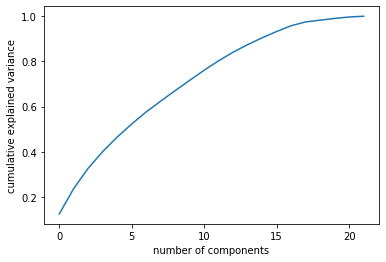

In [33]:
#no of components plot
pca = PCA().fit(X_1.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [34]:
# according to the graph the first 12 components contain approximately 90% of the variance
pca = PCA(n_components=12)
X_2 = pca.fit_transform(X_1)

DECSION TREE

45.733280100658156
51.89907568718544
61.58318815331011
65.23978900503292
69.03600464576074
70.28951316298877
71.8569734804491
71.64767228029423
72.23976480836237
71.99610433604336
72.51899438637244
72.06627468060395
71.8569734804491
71.57871176926055
71.09090689121177
70.32447735191637
69.9066008517228
69.76759097948121
69.73226384049556
69.76698606271776
69.59289101819589
69.20949477351917
69.20937379016647
69.34874661246612
69.10508614014711
69.2789392179636
69.17440960123885
69.24421699574138
69.13968737901664
69.10484417344173
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903
69.10472319008903


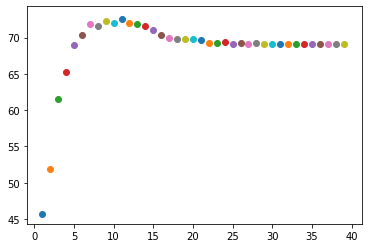

In [35]:
# search for the depth of the tree which returns the best precision of the model
for i in range(1,40):
    tree = DecisionTreeClassifier(criterion='gini',max_depth=i ,random_state=1)  
    tree .fit(X, y) 
    y_pred =tree .predict(X)
    kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
    score = cross_val_score(tree, X, y, cv=kfold)
    mean=score.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [ ]:
# According to the graph we see that the max_depth = 6 

In [36]:
tree = DecisionTreeClassifier(criterion='gini',max_depth=6,random_state=1)  
tree.fit(X, y) 
y_pred=tree.predict(X)


kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

#cross validation
score = cross_val_score(tree, X, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (score.mean()*100, score.std()*100))


mean accuracy 70.29% (standard deviation 3.41%)


In [37]:
#main answer is here
importance = tree.feature_importances_
column_names = X.columns.values.tolist()
importances = dict(zip(importance, column_names))

important_features = []

for ii in range(len(importance)):
    if ii < 3:
        important_features.append(importances[sorted(importance, reverse = True)[ii]])
        
print('The 3 most important features in decision tree model are: '+str(important_features))

The 3 most important features in decision tree model are: ['Road Surface_Wet or Damp', 'Road Surface_Dry', 'Age of Casualty']


RANDOM FOREST IMPLEMENTATION

In [38]:
y_forest=np.where(y=='Slight',0,np.where(y=='Serious',1,2))
y_forest=pd.DataFrame(data = y_forest, columns = ['Casualty Severity'])

KNN IMPLEMENTAITON

68.58195412311268
68.58207510646534
71.47394018583043
72.13511420828495
72.83282520325203
73.00631533101046
72.27497096399536
72.97123015873015
72.55274874177313
72.79665118079753
72.86657955865273
72.65739934185056
72.90190669763842
72.97123015873017
72.93650793650794
73.07563879210221
72.37877468060395
72.30933023615951
71.99549941927991
71.78680313588849
71.47345625241968
71.22955381339528
71.22967479674797
71.0555797522261
71.05582171893148
71.36928958575301
71.09090689121177
70.95117111885403
70.91669086333721
70.84664150212929
70.60261807975223
70.70726867982967
70.5328106852497
70.56789585753
70.28878726287263
70.2192218350755
70.39307491289199
70.32350948509485
70.18425764614788


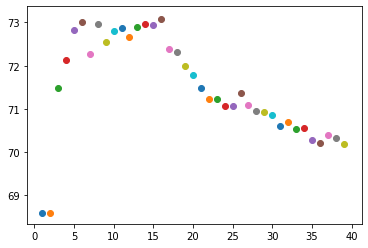

In [40]:
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i, p=2,
                               metric='minkowski')
    knn.fit(X_2, y)
    results3 = cross_val_score(knn, X_2, y, cv=kfold)
    mean=results3.mean()*100
    plt.scatter(i, mean)
    print(mean)
plt.show()

In [41]:
knn = KNeighborsClassifier(n_neighbors=5, p=2,
                               metric='minkowski')
knn.fit(X_2, y)

#cross validation
results3 = cross_val_score(knn, X_2, y, cv=kfold)

print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results3.mean()*100, results3.std()*100))

mean accuracy 72.83% (standard deviation 2.67%)


In [42]:
lr = LogisticRegression(C=100, random_state=1)


#le terme C est directement lié au paramètre de régularisation λ


lr.fit(X_2, y)

#cross validation
results1 = cross_val_score(lr, X_2, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results1.mean()*100, results1.std()*100))

mean accuracy 57.82% (standard deviation 2.51%)


In [43]:
X_3 = X.drop(['Road Surface_Dry', 'Weather Conditions_fine', 'Casualty Class_Driver', 'Type of Vehicle_other'], axis=1)

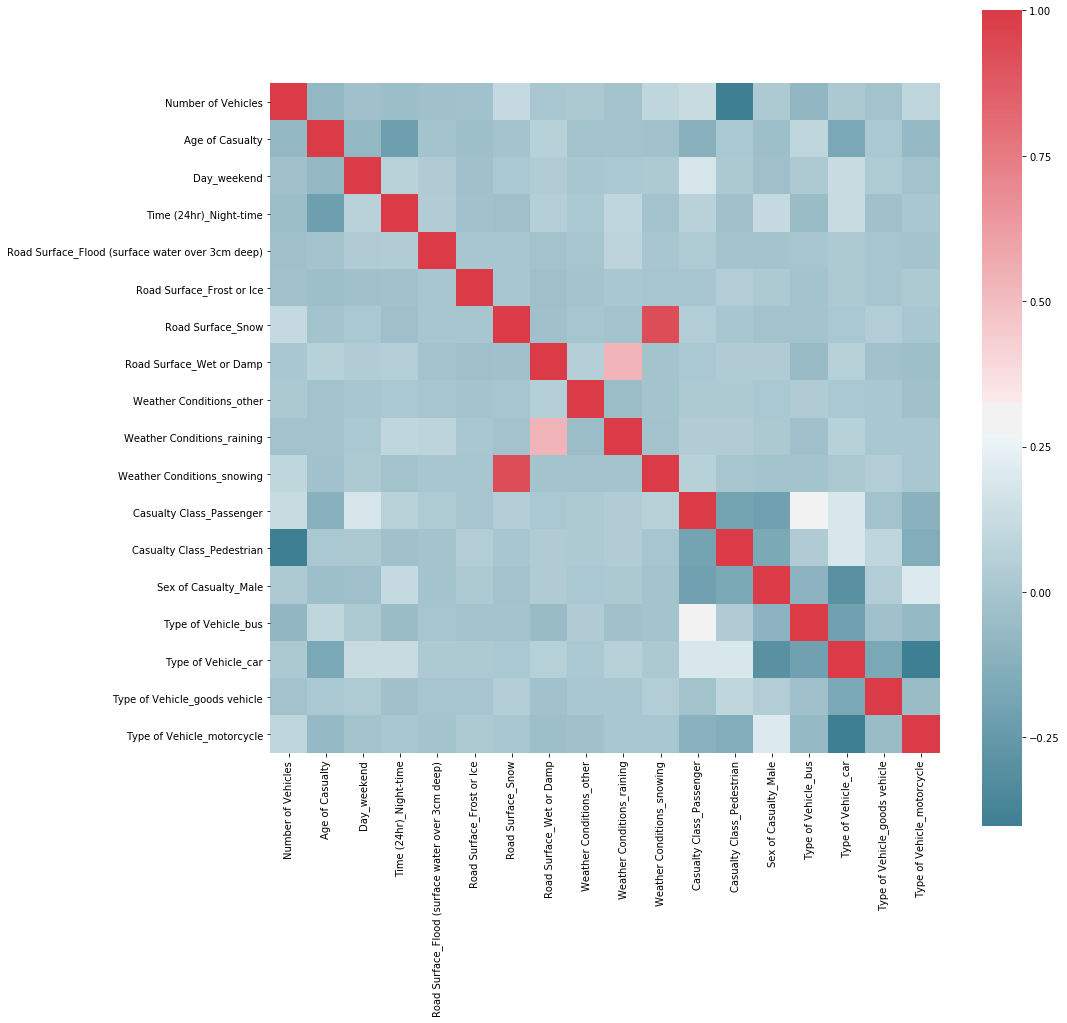

In [44]:
f, ax = plt.subplots(figsize=(15, 15))
corr = X_3.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [45]:
X_4 = X_3.drop(['Weather Conditions_other',
 'Weather Conditions_raining',
 'Weather Conditions_snowing'], axis=1)

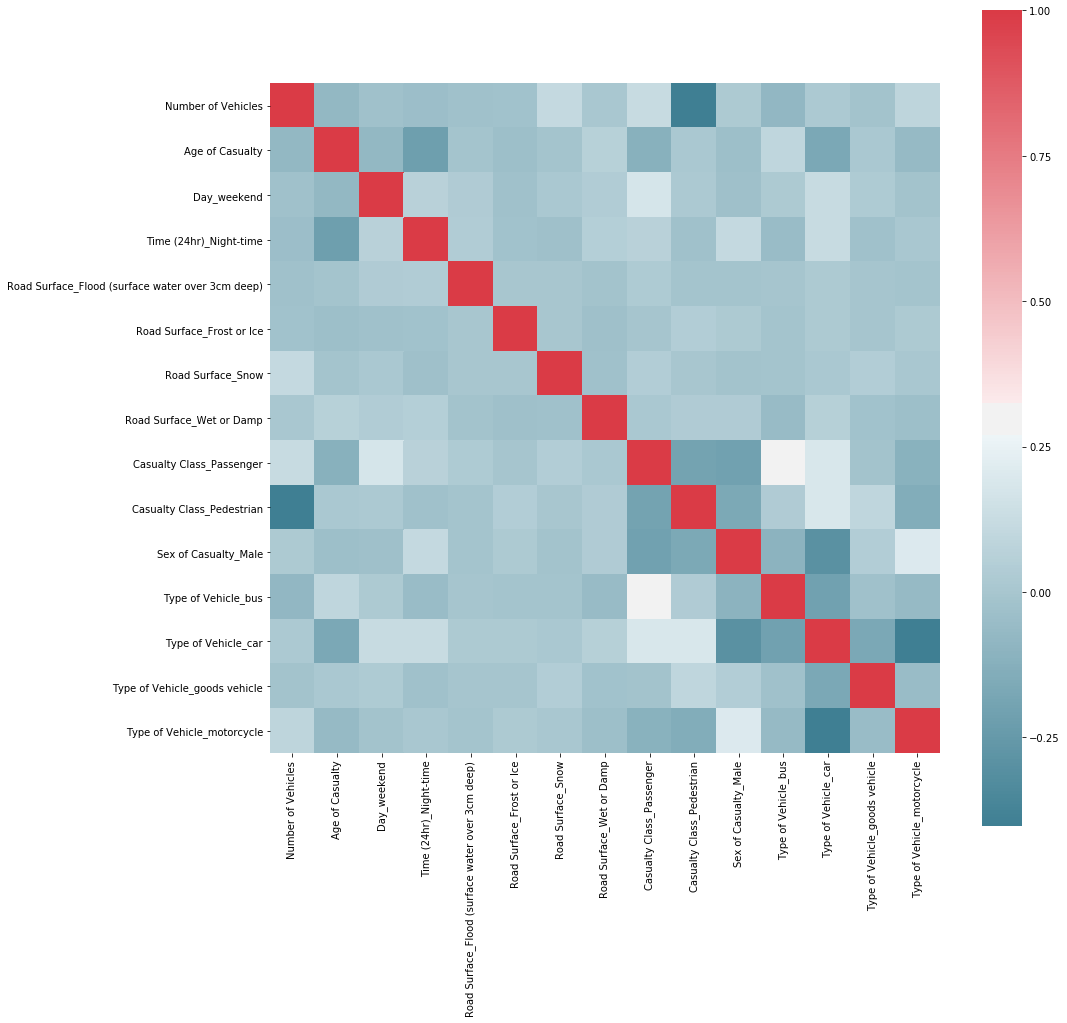

In [46]:
f, ax = plt.subplots(figsize=(15, 15))
corr = X_4.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()


In [47]:
r = LogisticRegression(C=100, random_state=1)
#the term C is directly related to the regularization parameter λ
lr.fit(X_4, y)

#cross validation
results2 = cross_val_score(lr, X_4, y, cv=kfold)
print("mean accuracy %.2f%% (standard deviation %.2f%%)" % (results2.mean()*100, results2.std()*100))

mean accuracy 61.13% (standard deviation 2.93%)


In [48]:
coef = lr.coef_[0]
table = [coef]
display(HTML(tabulate.tabulate(table, headers=list(X_4), tablefmt='html')))

Number of Vehicles,Age of Casualty,Day_weekend,Time (24hr)_Night-time,Road Surface_Flood (surface water over 3cm deep),Road Surface_Frost or Ice,Road Surface_Snow,Road Surface_Wet or Damp,Casualty Class_Passenger,Casualty Class_Pedestrian,Sex of Casualty_Male,Type of Vehicle_bus,Type of Vehicle_car,Type of Vehicle_goods vehicle,Type of Vehicle_motorcycle
-2.16406,0.0130071,-0.925926,0.0444908,-2.5605,-3.7458,-2.43169,-0.210332,-1.10067,-2.26692,-0.0884996,-4.05351,-0.785586,-3.53136,-1.63067


In [49]:
table = [["Decision Tree",round(score.mean()*100,2),round(score.std()*100,2)],
         ["Random Forest",round(score1.mean()*100,2),round(score1.std()*100,2)],
         
         ["KNN",round(results3.mean()*100,2) , round(results3.std()*100,2)],
         ["Logistic Regression with PCA", round(results1.mean()*100,2) , round(results1.std()*100,2)],
         ["Logistic Regression without PCA", round(results2.mean()*100,2) , round(results2.std()*100,2)]]
display(HTML(tabulate.tabulate(table, headers=["Algorithm","Mean Accuracy", "Standard Deviation"], tablefmt='html')))

Algorithm,Mean Accuracy,Standard Deviation
Decision Tree,70.29,3.41
Random Forest,64.83,4.83
KNN,72.83,2.67
Logistic Regression with PCA,57.82,2.51
Logistic Regression without PCA,61.13,2.93
